<h1> autoflip with dropout

In [1]:
# own skrips
import helperfile as hf
# generalls libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import uproot
from tensorflow.keras.optimizers import Adam
import time
from scipy.optimize import curve_fit
from matplotlib.colors import LogNorm

In [2]:
rootfile = uproot.open('./stage4_clusters_big.root')
ipd = hf.InputData_2photon(rootfile, sort_cond='none')
ipd.form_cluster()
ipd.train_test_split()
ipd.prep_trainingsdata()
ipd.prep_verificationdata()

Initialized object
Start shaping clusters in a  (9, 9)  grid...
Shaping the clusters took  216.11035084724426 s
Splitted data into training and test set!
Prepared 'veri_truth' data
Prepared 'veri_fit' data (Lednev fit from coral)


In [6]:
model = keras.models.load_model('./models/model_st4_min_dis_1cm')
output = model.predict(ipd.clusters_v)
output_flipped = np.roll(output, 3, axis=1)
mse = np.mean(np.square(output-ipd.veri_truth), axis=1)
mse_flipped = np.mean(np.square(output_flipped-ipd.veri_truth), axis=1)

ind_flip = np.where(mse_flipped<mse)
output[ind_flip] = np.roll(output[ind_flip], 3, axis=1)
ev = hf.Evaluation_2photon(ipd, output)

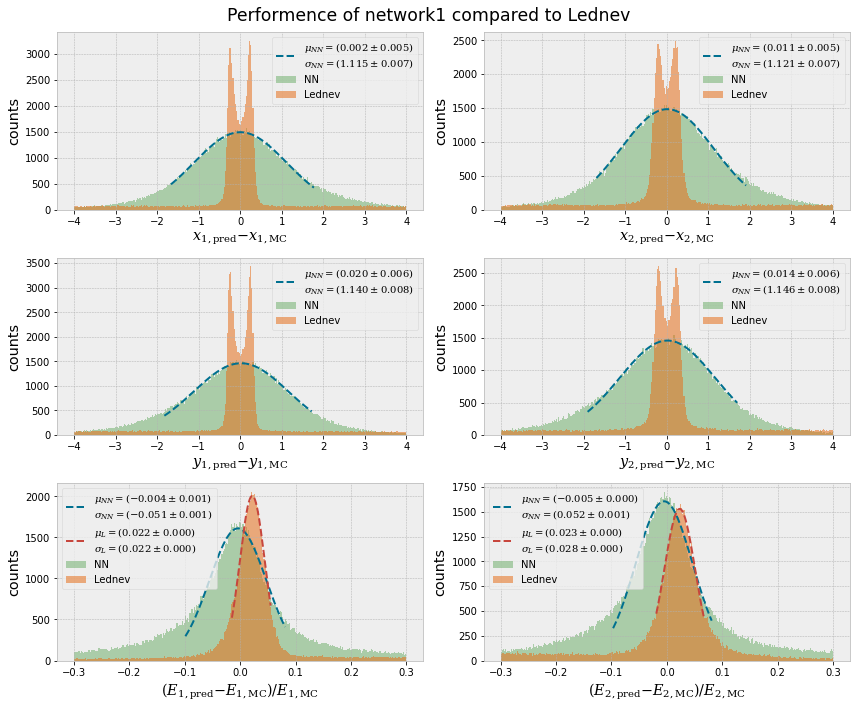

In [7]:
ev_fit_v_Lednev = ev.show_hist_NN_withLednev()

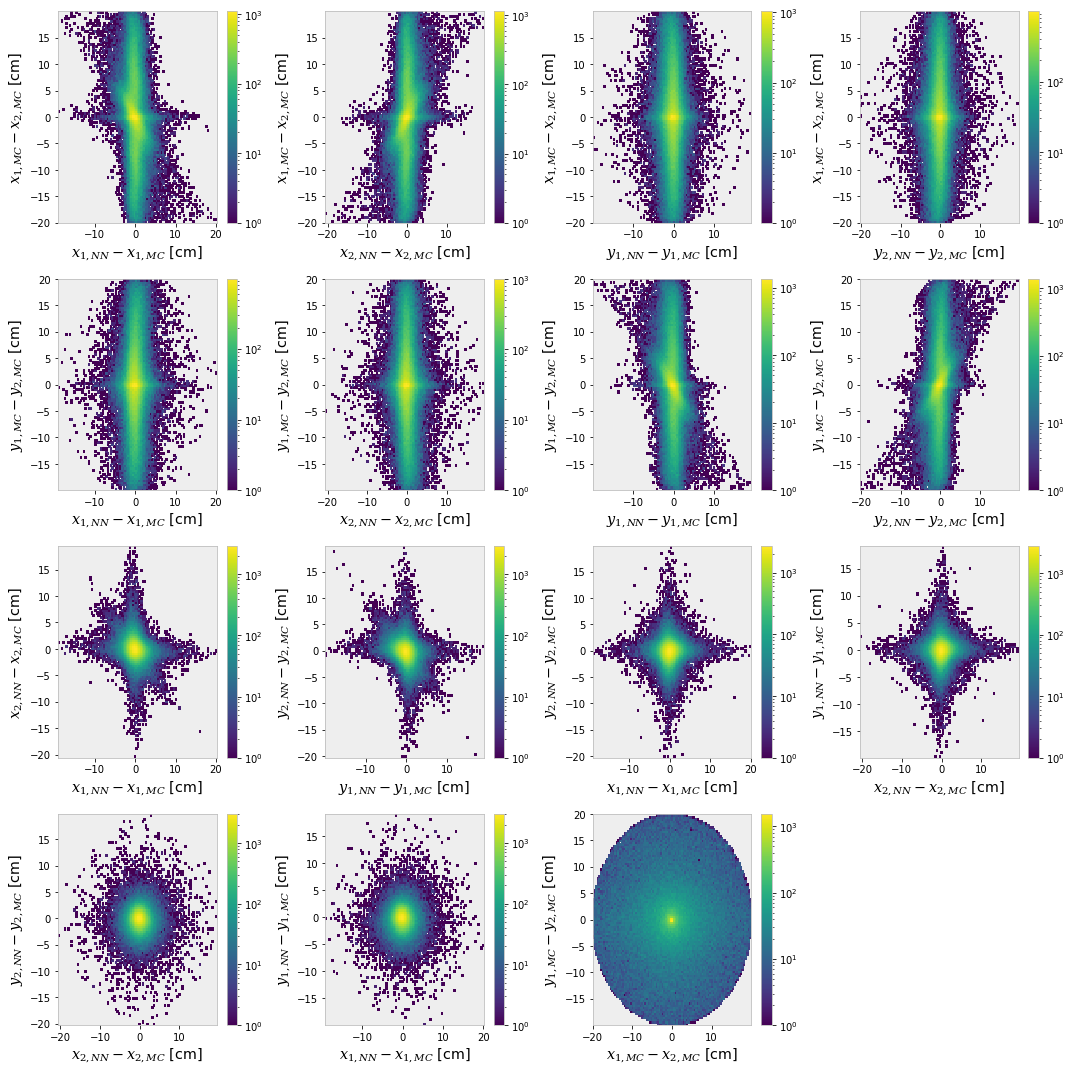

In [8]:
plt.rcParams["figure.figsize"] = (15,15)

diff_x = ev.x1_t-ev.x2_t
diff_y = ev.y1_t-ev.y2_t

# ersten 4: gegen x1_t - x2_t
plt.subplot(4,4, 1)
hist = plt.hist2d(ev.x1 - ev.x1_t, diff_x, norm=LogNorm(), bins=100)
plt.xlabel("$x_{1, NN} - x_{1, MC}$ [cm]")
plt.ylabel("$x_{1, MC} - x_{2, MC}$ [cm]")
plt.colorbar()

plt.subplot(4,4, 2)
hist = plt.hist2d(ev.x2 - ev.x2_t, diff_x, norm=LogNorm(), bins=100)
plt.xlabel("$x_{2, NN} - x_{2, MC}$ [cm]")
plt.ylabel("$x_{1, MC} - x_{2, MC}$ [cm]")
plt.colorbar()

plt.subplot(4,4, 3)
hist = plt.hist2d(ev.y1 - ev.y1_t, diff_x, norm=LogNorm(), bins=100)
plt.xlabel("$y_{1, NN} - y_{1, MC}$ [cm]")
plt.ylabel("$x_{1, MC} - x_{2, MC}$ [cm]")
plt.colorbar()

plt.subplot(4,4, 4)
hist = plt.hist2d(ev.y2 - ev.y2_t, diff_x, norm=LogNorm(), bins=100)
plt.xlabel("$y_{2, NN} - y_{2, MC}$ [cm]")
plt.ylabel("$x_{1, MC} - x_{2, MC}$ [cm]")
plt.colorbar()

# zweiten 4: gegen y1_t - y2_t
plt.subplot(4,4, 5)
hist = plt.hist2d(ev.x1 - ev.x1_t, diff_y, norm=LogNorm(), bins=100)
plt.xlabel("$x_{1, NN} - x_{1, MC}$ [cm]")
plt.ylabel("$y_{1, MC} - y_{2, MC}$ [cm]")
plt.colorbar()

plt.subplot(4,4, 6)
hist = plt.hist2d(ev.x2 - ev.x2_t, diff_y, norm=LogNorm(), bins=100)
plt.xlabel("$x_{2, NN} - x_{2, MC}$ [cm]")
plt.ylabel("$y_{1, MC} - y_{2, MC}$ [cm]")
plt.colorbar()

plt.subplot(4,4, 7)
hist = plt.hist2d(ev.y1 - ev.y1_t, diff_y, norm=LogNorm(), bins=100)
plt.xlabel("$y_{1, NN} - y_{1, MC}$ [cm]")
plt.ylabel("$y_{1, MC} - y_{2, MC}$ [cm]")
plt.colorbar()

plt.subplot(4,4, 8)
hist = plt.hist2d(ev.y2 - ev.y2_t, diff_y, norm=LogNorm(), bins=100)
plt.xlabel("$y_{2, NN} - y_{2, MC}$ [cm]")
plt.ylabel("$y_{1, MC} - y_{2, MC}$ [cm]")
plt.colorbar()

# dritten 4 +2: nicht gegen truth
plt.subplot(4,4, 9)
hist = plt.hist2d(ev.x1 - ev.x1_t, ev.x2 - ev.x2_t, norm=LogNorm(), bins=100)
plt.xlabel("$x_{1, NN} - x_{1, MC}$ [cm]")
plt.ylabel("$x_{2, NN} - x_{2, MC}$ [cm]")
plt.colorbar()

plt.subplot(4,4, 10)
hist = plt.hist2d(ev.y1 - ev.y1_t, ev.y2 - ev.y2_t, norm=LogNorm(), bins=100)
plt.xlabel("$y_{1, NN} - y_{1, MC}$ [cm]")
plt.ylabel("$y_{2, NN} - y_{2, MC}$ [cm]")
plt.colorbar()

plt.subplot(4,4, 11)
hist = plt.hist2d(ev.x1 - ev.x1_t, ev.y2 - ev.y2_t, norm=LogNorm(), bins=100)
plt.xlabel("$x_{1, NN} - x_{1, MC}$ [cm]")
plt.ylabel("$y_{2, NN} - y_{2, MC}$ [cm]")
plt.colorbar()

plt.subplot(4,4, 12)
hist = plt.hist2d(ev.x2 - ev.x2_t, ev.y1 - ev.y1_t, norm=LogNorm(), bins=100)
plt.xlabel("$x_{2, NN} - x_{2, MC}$ [cm]")
plt.ylabel("$y_{1, NN} - y_{1, MC}$ [cm]")
plt.colorbar()

plt.subplot(4,4, 13)
hist = plt.hist2d(ev.x2 - ev.x2_t, ev.y2 - ev.y2_t, norm=LogNorm(), bins=100)
plt.xlabel("$x_{2, NN} - x_{2, MC}$ [cm]")
plt.ylabel("$y_{2, NN} - y_{2, MC}$ [cm]")
plt.colorbar()

plt.subplot(4,4, 14)
hist = plt.hist2d(ev.x1 - ev.x1_t, ev.y1 - ev.y1_t, norm=LogNorm(), bins=100)
plt.xlabel("$x_{1, NN} - x_{1, MC}$ [cm]")
plt.ylabel("$y_{1, NN} - y_{1, MC}$ [cm]")
plt.colorbar()

# zuletzt truth gegen turth

plt.subplot(4,4, 15)
hist = plt.hist2d(diff_x, diff_y, norm=LogNorm(), bins=100)
plt.xlabel("$x_{1, MC} - x_{2, MC}$ [cm]")
plt.ylabel("$y_{1, MC} - y_{2, MC}$ [cm]")
plt.colorbar()

plt.tight_layout()